___
# Ciência dos Dados - PROJETO 3

___
### *Bruno Kaczelnik, Guilherme Lotaif, Renato Tajima, Thiago Verardo*
___

# Análise de Airbnb nas maiores cidades americanas

___

## 1. Introdução

   Neste Projeto será feita uma análise dos dados que possuimos de Airbnb nos Estados Unidos, e a partir dos dados que julgarmos pertinentes ao nosso estudo. Serão usados diferentes **métodos de predição** para descobrir`o preço de um aluguel dependendo das características fornecidas`, após usarmos os diferentes métodos, vamos comparar os resultados de cada método, finalmente poderemos concluir o projeto..

   Um pouco mais sobre a plataforma digital Airbnb: Ela é utilizada para efetuar o aluguel de uma casa ou apartamento de outros usuários da própria plataforma. Com anúncios em 192 países, podemos concluir que é uma plataforma é bem grande, somente nos Estados Unidos existem aproximadamente 600.000 possiveis locais para aluguel. Com tantas opções, a escolha que o usuário faz quanto ao local é feita baseada nas **informações fornecidas pelo propretario**, tais informações podem variar desde quantos banheiros a residência possui, até se ela possui acesso a uma rede Wifi.

**Fonte do dataset:** www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml

___
## 2. Minerando a base de dados do dataset

O dataset que vamos utilizar nesse projeto possui diversas colunas com informações dos Airbnb nos Estados Unidos, com variáveis qualitativas e quantitativas, portanto temos que percorrer todas essas colunas para fazer uma limpeza, e deixar somente as informações que serão pertinentes a nossa análise.

**Importando as bibliotecas que serão utilizadas:**

In [1]:
#Importando bibliotecas:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from statsmodels.formula.api import ols

plt.style.use('ggplot')

<br>

Como iremos mexer bastante com o nosso dataset é bastante comum que avisos apareçam, portanto vamos filtra-los para que os mesmos nao prejudiquem a visualização do projeto:

In [2]:
#Vamos remover os avisos para manter a exibição mais limpa:
warnings.filterwarnings("ignore")



### • Base de dados

Para que possamos trabalhar com os dados que obtidos a partir do site: www.kaggle.com, primeiro precisamos abrir o arquivo. No caso estaremos abrindo somente o arquivo de treino (que no futuro será dividido em treino e teste), uma vez que ele ja tem uma quantidade de dados suficiente para que façamos nosso trabalho.

In [3]:
#Vamos descobrir em qual diretório do computador vamos trabalhar:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/guilherme/Downloads/Projeto-3-CDD---DPA-master


**Vamos abrir o arquivo:**

In [4]:
#Importado o arquivo de treinamento:
df = pd.read_csv('train.csv')

In [5]:
#Análisando o tamanho do dataframe de treino:
linhas, colunas = df.shape
print("O Dataframe possui {0} linhas por {1} colunas".format(linhas, colunas))

O Dataframe possui 74111 linhas por 29 colunas


In [6]:
df.sample(2)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
49454,15990376,6.135565,Loft,Private room,"{Internet,""Wireless Internet"",Kitchen,""Pets al...",2,1.5,Real Bed,flexible,False,...,37.763111,-122.420527,"Hip, 2- Story Loft in the Mission",Mission District,0,NaN,https://a0.muscache.com/im/pictures/77264406/d...,94110,1.0,2.0
29466,9280612,4.867534,Townhouse,Private room,"{""Wireless Internet"",Heating,""Smoke detector"",...",1,1.0,Real Bed,moderate,False,...,37.801656,-122.446211,SF Garden Studio w/ensuite bath,Marina,75,97.0,https://a0.muscache.com/im/pictures/95747930/d...,94123,1.0,1.0


...

#### Limpando o dataframe de treino para ser análisado:
Esta etapa consiste em uma preparação do dataframe para facilitar a análise do mesmo, assim evitando ocorrências de complicações ou erros que possam atrapalhar o desempenho dos nosssos classificadores no futuro. Portanto iremos: limpar os epaços dos títulos de cada coluna; remover os valores nulos de cada categoria, assim como deletar colunas que julgarmos desnecessárias para o nosso trabalho.

In [7]:
#Removendo os espaços em branco dos títulos das colunas:
df.columns = [espaços.strip() for espaços in df.columns.tolist()]

In [8]:
#Convertendo uma string de porcentagem para float:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float')

In [9]:
#Removendo colunas que não são pertinentes ao estudo:
df = df.drop(["latitude","longitude","name","thumbnail_url","id","description","amenities","zipcode",
              "host_since","first_review","last_review"],axis=1);

In [10]:
#Apagando valores nulos que podem causar problemas posteriores:
df = df.dropna(axis=0, subset=['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms','bed_type',
                               'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'beds', 
                               'host_identity_verified','host_response_rate', 'instant_bookable', 'neighbourhood',
                               'review_scores_rating','bedrooms'])

In [11]:
#Corrigindo simplificação no arquivo:
df.loc[(df["instant_bookable"] == "f"),"instant_bookable"] = "False"
df.loc[(df["instant_bookable"] == "t"),"instant_bookable"] = "True"

df.loc[(df["host_has_profile_pic"] == "f"),"host_has_profile_pic"] = "False"
df.loc[(df["host_has_profile_pic"] == "t"),"host_has_profile_pic"] = "True"

df.loc[(df["host_identity_verified"] == "f"),"host_identity_verified"] = "False"
df.loc[(df["host_identity_verified"] == "t"),"host_identity_verified"] = "True"

In [12]:
df.sample(2)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,neighbourhood,number_of_reviews,review_scores_rating,bedrooms,beds
51336,5.247024,Apartment,Entire home/apt,8,2.0,Real Bed,strict,True,LA,True,True,100.0,False,Mid-Wilshire,103,93.0,2.0,4.0
2458,4.174387,Apartment,Private room,2,2.0,Real Bed,moderate,True,NYC,True,True,100.0,False,Bushwick,1,100.0,1.0,1.0


In [13]:
#Análisando o tamanho do dataframe de treino:
linhas_limpas, colunas_limpas = df.shape
print("Após a limpeza do Dataframe, ele possui {0:.1f}% linhas a menos e {1:.1f}% colunas a menos".format(((linhas-linhas_limpas)/linhas)*100, ((colunas-colunas_limpas)/colunas)*100))

Após a limpeza do Dataframe, ele possui 41.9% linhas a menos e 37.9% colunas a menos


...


#### Transformando categorias qualiativas em quantitativas:
Como os nosso modelos preditivos necessitam de variáveis quantitativas, é necessário que uma conversão seja efetuada para possibilitar o funcionamento das ferramentas.<br>
O método usado para efetuar essa conversão é chamado de **One Hot Encoding**, que transforma variáveis categóricas em vetores binários. Tal método transforma todas as variáveis em 0 menos quando o item(coluna) analisado tiver resposta positiva, desse modo, podemos dizer que estamos transofrpermitindo a realização de análises em cima desse dados.
<br>
<br>

In [14]:
#Função para chamar o get_dummies e remover a coluna base:
def dummify(data, column_name):
    df1 = data.copy()
    df2 = pd.concat([df1.drop(column_name, axis=1), pd.get_dummies(data[column_name], prefix=column_name)], axis=1)
    return df2

#Fazendo as conversões das nossas colunas:
df_modelos = dummify( df, "property_type")
df_modelos = dummify( df_modelos, "room_type")
df_modelos = dummify( df_modelos, "bed_type")
df_modelos = dummify( df_modelos, "cancellation_policy")
df_modelos = dummify( df_modelos, "cleaning_fee")
df_modelos = dummify( df_modelos, "city")
df_modelos = dummify( df_modelos, "host_has_profile_pic")
df_modelos = dummify( df_modelos, "host_identity_verified")
df_modelos = dummify( df_modelos, "instant_bookable")
df_modelos = dummify( df_modelos, "neighbourhood")

<br>

 Agora, possuímos um `df` que usaremos para a análise descritiva, que é composto por tanto as variáveis qualitativas quanto pelas quantitativas. Também temos o `df_modelo` que será usado para nossos modelos de regressão, devido a ter todas as variáveis qualitativas transformadas em quantitativas, através do **One Hot Encoding**, além das variáveis que ja eram quantitativas originalmente. 

...
<br>

### • Análise descritiva

Após finalizarmos o filtro e limpeza do nosso Dataframe, é necessário fazer uma análise exploratória dos dados do mesmo, com o objetivo de entender melhor o como e quais váriaveis influênciam no nosso estudo, além de descobrir quais delas estão mais associadas. Lembrando que a análise irá relacionar as informações mais relevantes com o valor dos Airbnb, uma vez que posteriormente tentaremos descobrir quão bem os modelos serão capazes de prever o valor dos alugueis baseado somente nos dados fornecidos.<br>
As análises serão feitas com o auxílio de ferramentas como seaborn, e o pandas_profiling.


#### Será que tem um tipo de quarto predominante?

In [15]:
#Vamos descobrir a quantidade de cada tipo de quarto existe nos dados:
Tipo_quarto = df.room_type.value_counts()

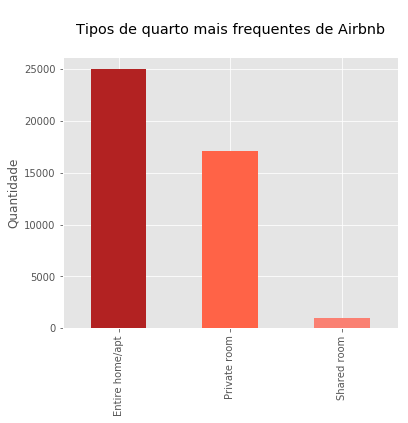

In [16]:
#Criando uma tabela com os dados:
plot = Tipo_quarto.plot(kind='bar', figsize=(6, 5), color = ["firebrick","tomato","salmon"],align='center')
plt.title("\nTipos de quarto mais frequentes de Airbnb\n")
plt.ylabel('Quantidade')
plt.show()

`Existe uma diferença de valor entre eles?`

Agora que ja vimos qual o tipo mais comum, podemos ver se existe alguma diferença de valor médio do aluguel dos 3 tipos de quarto.

In [17]:
#Criando listas vazias para cada tipo de quarto:
entire, private, shared = [],[],[]

#Vamos usar um loop para percorrer nosso dataframe:
for tipo, preco in zip(df['room_type'],df['log_price']):
    #Quando o tipo for "Casa/apt" irá adicionar o preco na sua lista:
    if tipo == "Entire home/apt":
        entire.append(preco)
    #Quando o tipo for "Quarto privado" irá adicionar o preco na sua lista:
    elif tipo == "Private room":
        private.append(preco)
    #Quando o tipo for "Quarto compartilhado" irá adicionar o preco na sua lista:
    elif tipo == "Shared room":
        shared.append(preco)

In [18]:
#Vamos imprimir os preços médios:
print("Preços médios de cada tipo (em log):",
      "\n Entire room:  {:.2f}\n".format(np.mean(entire)),
      "Private room: {:.2f}\n".format(np.mean(private)),
      "Shared room:  {:.2f}".format(np.mean(shared)))

Preços médios de cada tipo (em log): 
 Entire room:  5.14
 Private room: 4.30
 Shared room:  3.78


Portanto percebemos que a quantidade de cada tipo de quarto realmente se altera, e além disso também vemos que cada tipo de quarto possui um preço médio diferente. Fazendo dessa variável de grande influência.

...<br>


**Vamos análisar nos tipos de propriedade**

Assim como no item anterior, ja é esperado que tenham alguns tipos que sejam mais recorrentes

In [19]:
#Vamos descobrir os tipos de propriedade mais frequentes nos dados:
Tipo_propriedade = df.property_type.value_counts()

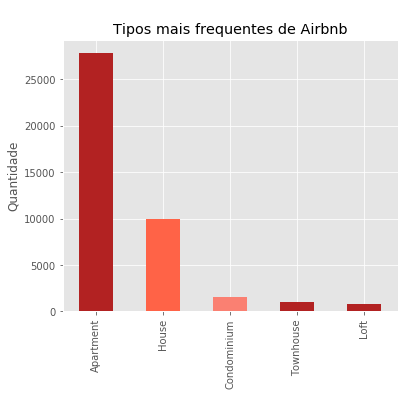

In [20]:
#Criando uma tabela com os dados:
plot = Tipo_propriedade.head(5).plot(kind='bar',figsize=(6, 5), color = ["firebrick","tomato","salmon"])
plt.title("\nTipos mais frequentes de Airbnb")
plt.ylabel('Quantidade')
plt.show()

`Será que o preço médio desses tipos é próximo?`

Agora que ja achamos os 5 tipos mais comuns, podemos ver se existe alguma diferença de valor médio de seus alugueis

In [21]:
#Criando listas vazias para cada tipo de propriedade:
apartment, house, condominium, townhouse, loft = [],[],[],[],[]
#Criando Variáveis nulas para cada tipo de propriedade:
apartment_conatdor, house_conatdor, condominium_conatdor, townhouse_conatdor, loft_conatdor = 0,0,0,0,0

#Vamos usar um loop para percorrer nosso dataframe:
for tipo, preco in zip(df['property_type'],df['log_price']):
    #Quando o tipo for "Apartment" irá adicionar o preco na sua lista:
    if tipo == "Apartment":
        apartment.append(preco)
        apartment_conatdor+=1
    #Quando o tipo for "House" irá adicionar o preco na sua lista:
    elif tipo == "House":
        house.append(preco)
        house_conatdor+=1
    #Quando o tipo for "Condominium" irá adicionar o preco na sua lista:
    elif tipo == "Condominium":
        condominium.append(preco)
        condominium_conatdor+=1
    #Quando o tipo for "Townhouse" irá adicionar o preco na sua lista:
    elif tipo == "Townhouse":
        townhouse.append(preco)
        townhouse_conatdor+=1
    #Quando o tipo for "Loft" irá adicionar o preco na sua lista:
    elif tipo == "Loft":
        loft.append(preco)
        loft_conatdor+=1
        
#Criando uma variável para atribuir o valor de total dentre os 5 tipos mais recorrentes:
Total_propriedades = apartment_conatdor + house_conatdor + condominium_conatdor + townhouse_conatdor + loft_conatdor

In [22]:
#Vamos imprimir os preços médios:
print("Preços médios de cada tipo (em log):",
      "\n Apartment:  {:.2f}\n".format(np.mean(apartment)),
      "House:      {:.2f}\n".format(np.mean(house)),
      "Condominium:{:.2f}\n".format(np.mean(condominium)),
      "Townhouse:  {:.2f}\n".format(np.mean(townhouse)),
      "Loft:       {:.2f}".format(np.mean(loft)))

Preços médios de cada tipo (em log): 
 Apartment:  4.76
 House:      4.77
 Condominium:4.96
 Townhouse:  4.81
 Loft:       5.00


A partir desses dados precebemos que o preço do aluguel não está tão ligado ao tipo da propriedade quanto o tipo de quarto. Porém ainda existe uma infuência, mesmo que pequena.

<br>

`Mas a variável ainda é importante`

Isso porque existe uma grande disparidade entre os seus tipos, como podemos ver no gráfico acima. Mas vamos ver com maior precisão:

In [23]:
#Vamos imprimir a porcentagem de cada tipo:
print("porcentagem dos 5 tipos mais comuns:",
      "\n Apartment:  {0:.1f}%\n".format((apartment_conatdor/Total_propriedades)*100),
      "House:      {0:.1f}%\n".format((house_conatdor/Total_propriedades)*100),
      "Condominium:{0:.1f}%\n".format((condominium_conatdor/Total_propriedades)*100),
      "Townhouse:  {0:.1f}%\n".format((townhouse_conatdor/Total_propriedades)*100),
      "Loft:       {0:.1f}%".format((loft_conatdor/Total_propriedades)*100))

porcentagem dos 5 tipos mais comuns: 
 Apartment:  67.6%
 House:      24.1%
 Condominium:3.8%
 Townhouse:  2.6%
 Loft:       1.9%


Os resultados acima são feitos somente com as 5 categorias mais recorrentes, porque as outras nao tem quantidade significante. Desse modo vemos que quanto maior a quantidade de Airbnbs de cada tipo de propriedade, menor vai ser o preço médio por ter grande variação do preço no grupo

...<br>


#### Vamos descobrir algumas correlações:

In [24]:
#Criando um datafreame com nossas variáveis quantitativas para calcular a correlação entre elas:
correlacoes_log = df[['log_price', 'accommodates', 'bathrooms', 'cleaning_fee', 'beds','host_response_rate',
                      'review_scores_rating','bedrooms']]

#Calculando a correlação:
correlacoes_log.corr().head(1)

,log_price,accommodates,bathrooms,cleaning_fee,beds,host_response_rate,review_scores_rating,bedrooms
log_price,1.0,0.594578,0.345265,0.170305,0.462411,0.002971,0.075217,0.502518


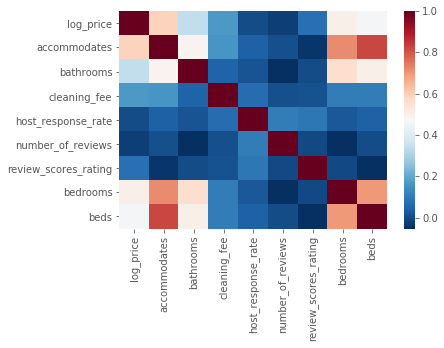

In [25]:
#Fazendo mais uma correlação:
corr = df.corr()
#Vamos usar o seaborn para analisar as correlações mais uma vez:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'RdBu_r');

...


### • Análise pelo Pandas Profiling:

Esta função normalmente é usada quando queremos fazer uma análise exploratória um pouco mais completa e de maneira rapida e intuitiva. Tal método funciona de maneira que quando a função é chamada, ela cria uma análise dos dados do Dataframe através do pandas.

A ferramenta requer uma intalação:

**PIP INSTALL**<br>
Para instalar através do PIP, use o comando:

`pip install pandas-profiling`

**CONDA INSTALL**<br>
Para isntalar através do Conda, use o comando:

`conda install -c anaconda pandas-profiling`

<br>

In [26]:
# Utilizando o pandas_profiling para uma análise descritiva mais completa:
pandas_profiling.ProfileReport(df)

Number of variables,19
Number of observations,43092
Total Missing (%),0.0%
Total size in memory,6.0 MiB
Average record size in memory,145.0 B
Numeric,9
Categorical,9
Boolean,1
Date,0
Text (Unique),0
Rejected,0


<br>

A análise exploratória mostra que existem fortes correlações entre o preço e a quantidade de camas, preço e a quantidade de banheiros, preço e a quantidade de banheiros e preço e a quantidade de pessoas acomodadas. Essas são as mais importantes, por influenciarem fortemente no preço. 

Já as correlações fracas são entre o preço e o número de reviews, preço e a frequencia de resposta do dono, preço e a taxa de limpeza e o preço e os reviews feitos na casa (impressionantemente).

Isso nos ajudará a modelar melhor nossa análise e melhorar o nosso modelo. Dado que sabemos quais correlações são mais altas e mais baixas. Caso a regressão linear não fique muito precisa, retirar uma das variáveis que se correlacionam pode melhorar a precisão.

<br>

___
## 3. Modelos de predição

Adequando nosso dataframe para as predições:

In [27]:
#Tirando colunas que não vamos precisar:
df_pred = df_modelos.drop(["log_price"],axis=1)

In [28]:
#Importando bibliotecas para usar no statsmodel:
from sklearn.linear_model import LinearRegression
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import statsmodels.api as sm

#Estabelecendo variave random_seed:
RANDOM_SEED = 10
np.random.seed(RANDOM_SEED)

In [29]:
#Dividindo os dados do dataframe em teste e treino:
X_train, X_test, y_train, y_test = train_test_split(df_pred, df_modelos.log_price, test_size = 0.33,random_state = RANDOM_SEED)

...<br>
<br>

o `MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa)`

In [30]:
#Precisamos separar uma vez específica a nossa base de dados em treino e teste, porque precisamos que todos tenham o preço:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df, df, test_size = 0.33,random_state = RANDOM_SEED)
#Criando uma função para calcular o r_squared:
def r_2(y_test, y_train):
    a = 0
    b = 0
    #Vamos usar um loop para atribuir os valores nas variáveis:
    for i in y_train["log_price"]:
        a += (i - np.mean(y_train["log_price"]))**2
        b += (i - np.mean(y_test["log_price"]))**2
    #Retornando o valor o r squared:
    return 1-(a/b)

In [31]:
#Vamos usar a função para calcular o r squared:
R2_MEAN = r_2(y_test_2,y_train_2)
#A partir do nosso r squared vamos calcular o rms:
RMS_Mean = np.sqrt(R2_MEAN)
#Descobrindo a qualidade do modelo de predição:
print("R2 é de: {:.7f}".format(R2_MEAN))

print("RMS é de: {:.4f}".format(RMS_Mean))

R2 é de: 0.0000019
RMS é de: 0.0014


...<br>
<br>

o `MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)`

In [32]:
#Importando as bibliotecas necessárias para esse modelo:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
# Chamando o classificador:
knn = KNeighborsRegressor(n_neighbors=3)

#Fazendo um fit nos dados de treino(treinando o algoritmo):
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [34]:
#Descobrindo a qualidade do modelo de predição:
knn_test = r2_score(y_test, knn_pred)
print('R2 é de: {:.2f}'.format(knn_test))


RMS_K_Nearest = np.sqrt(np.mean(knn_test))
print("RMS é de: {:.2f}".format(RMS_K_Nearest))

R2 é de: 0.43
RMS é de: 0.66


...<br>
<br>

o `MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)`

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
#Chamando o classificador com o statsmodel:
linear = LinearRegression()
Xc = sm.add_constant(X_test)
model = sm.OLS(y_test,Xc)
results = model.fit()

linear_test=results.rsquared

#results.summary()

In [37]:
#Descobrindo a qualidade do modelo de predição:
print("R2 é de: {:.2f}".format(results.rsquared))

RMS_Linear_Regression = np.sqrt(np.mean(results.rsquared))
print("RMS é de: {:.2f}".format(RMS_Linear_Regression))

R2 é de: 0.75
RMS é de: 0.86


...<br>
<br>

o `MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)`

In [38]:
#Importando as bibliotecas necessárias para esse modelo:
from sklearn.tree import DecisionTreeRegressor

In [39]:
#Chamando o classificador:
tree = DecisionTreeRegressor()

#Fazendo um fit nos dados de treino:
tree.fit(X_train, y_train)   

tree_pred = tree.predict(X_test)

In [40]:
#Descobrindo a qualidade do modelo de predição:
tree_test = r2_score(y_test, tree_pred)
print("R2 é de: {:.2f}".format(tree_test))


RMS_Tree_Regression = np.sqrt(np.mean(tree_test))
print("RMS é de: {:.2f}".format(RMS_Tree_Regression))

R2 é de: 0.50
RMS é de: 0.71


...<br>
<br>

o `MODELO RANDOM FOREST (Para comparação`

In [41]:
#Importando as bibliotecas necessárias para esse modelo:
from sklearn.ensemble import RandomForestRegressor

In [42]:
#Chamando o RandomForestClassifier:
model = RandomForestRegressor()

#Fazendo um fit nos dados de treino:
model.fit(X_train, y_train)

random_pred = model.predict(X_test)

In [43]:
#Descobrindo a qualidade do modelo de predição:
random_test = r2_score(y_test, random_pred)
print('R2 é de: {:.2f}'.format(random_test))


RMS_RANDOM_FOREST = np.sqrt(np.mean(random_test))
print("RMS é de: {:.2f}".format(RMS_RANDOM_FOREST))

R2 é de: 0.69
RMS é de: 0.83


___
## 4. Processo e estatísticas de validação

A partir dos  nosso r2 obtidos através dos modelos criados anteriormente, podemos comparar os resultados que cada modelo de predição teve.

In [44]:
#Utilizando o codigo do regressor para calcular a sua qualidade dessa vez analisando o treino:
knn_train_pred = knn.predict(X_train)
#Atribuindo o valor do r_squared do treino:
knn_train = r2_score(y_train, knn_train_pred)

In [48]:
#Utilizando o codigo do regressor para calcular a sua qualidade dessa vez analisando o treino:
tree_train_pred = tree.predict(X_train)
#Atribuindo o valor do r_squared do treino:
tree_train = r2_score(y_train, tree_train_pred)

In [49]:
#Utilizando o codigo do regressor para calcular a sua qualidade dessa vez analisando o treino:
random_train_pred = model.predict(X_train)
#Atribuindo o valor do r_squared do treino:
random_train = r2_score(y_train, random_train_pred)

In [59]:
#Utilizando o codigo do regressor para calcular a sua qualidade dessa vez analisando o treino:
Xc = sm.add_constant(X_train)
model = sm.OLS(y_train,Xc)
results = model.fit()
#Atribuindo o valor do r_squared do treino:
linear_train = results.rsquared

In [60]:
#Atribuindo os valores em listas para plotarmos uma tabela mais tarde:
Valores_teste = [R2_MEAN, knn_test,linear_test,tree_test,random_test]
Valores_treino= [R2_MEAN, knn_train,linear_train,tree_train,random_train]

In [61]:
#Criando um dicionario com a nossa tabela:
TABELA_P = {"Regressões":["MÉDIA","KNN","LINEAR","TREE","FOREST"],'$R^2$_treino':Valores_treino,"$R^2$_teste":Valores_teste}

In [62]:
#Trasformando nosso dicionario em uma tebela:
tab_r2 = pd.DataFrame.from_dict(TABELA_P)
#Vamos visualizar nossos resultados:
tab_r2

,Regressões,$R^2$_treino,$R^2$_teste
0,MÉDIA,0.000002,0.000002
1,KNN,0.718717,0.433224
2,LINEAR,0.746067,0.746610
3,TREE,0.999243,0.499996
4,FOREST,0.946302,0.692354


A partir da tabela acima é possivel perceber que o tamanho pequeno do dataframe de teste que usamos acaba interferindo e prejudicando seu desempenho, exceto em uma ocasiao, que é a regressão linear, essa nao há quase alteração nenhuma entre as duas bases de dados com tamhos diferentes. Ao analisar mais minunciosamente conseguimos identificar que a disparidade entre as regressões com tamnhos de dataframe diferentes é bem grande. 

In [63]:
#Descobrindo os valores do rms de treino dos regressores:
RMS_K_Nearest_train = np.sqrt(np.mean(knn_train))
RMS_Linear_Regression_train = np.sqrt(np.mean(linear_train))
RMS_Tree_Regression_train = np.sqrt(np.mean(tree_train))
RMS_RANDOM_FOREST_train = np.sqrt(np.mean(random_train))

In [64]:
#Atribuindo os valores em listas para plotarmos uma tabela mais tarde:
Valores_rms_teste = [RMS_Mean, RMS_K_Nearest,RMS_Linear_Regression,RMS_Tree_Regression,RMS_RANDOM_FOREST]
Valores_rms_treino= [RMS_Mean, RMS_K_Nearest_train,RMS_Linear_Regression_train,RMS_Tree_Regression_train,RMS_RANDOM_FOREST_train]

In [65]:
#Criando um dicionario com a nossa tabela:
TABELA_rms = {"Regressões":["MÉDIA","KNN","LINEAR","TREE","FOREST"],'RMS_treino':Valores_rms_treino,"RMS_teste":Valores_rms_teste}

In [66]:
#Trasformando nosso dicionario em uma tebela:
tab_rms = pd.DataFrame.from_dict(TABELA_rms)
#Vamos visualizar nossos resultados:
tab_rms

,Regressões,RMS_treino,RMS_teste
0,MÉDIA,0.001363,0.001363
1,KNN,0.847772,0.658198
2,LINEAR,0.863751,0.864066
3,TREE,0.999621,0.707104
4,FOREST,0.972781,0.832078


Diferente da tabela anterior que os valores possuiam um alto nível de disparidade quando comparando os valores de treino e teste, dessa vez, ao calcular o rms, podemos dizer que a quantidade dos dados nao alterou tanto os resultados, além de seus resultados terem sido mais positivos que os do $R^2$.

___
## 5. Conclusão

Ao final da construção de cada previsão é possível achar o valor de $R^2$, ou seja, o valor que mede o quão bem uma predição capta a variação dentro dos dados, e o $RMS$, uma medida que informa a imperfeição do ajuste estimado dos dados. Tendo isso em mente, deve-se avaliar seus valores para que assim possa se escolher o melhor modelo preditico, que no nosso caso é da regressão linear, com um $R^2$ e um $RMS$ valendo 0,75 e 0,86, respectivamente. Isso acontece, pois esse é modelo preditivo, que de acordo com o dataframe analisado, é aquele que realmente leva em consideração as variáveis que mais influenciam no problema (como pode ser observado na conclusão da descrição).
   
   Os outros modelos apresentam valores de $R^2$ e $RMS$ menores da regressão. O modelo reaalizado a partir da média é o pior de todos, tendo um $R^2$ e $RMS$ muitos próximos de zero, uma vez que ele não leva em conta nenhuma outra váriavel a não ser o do próprio preço. Os modelos de predição da árvore de regressão e do random forest são bem semelhante e confiáveis, possuindo um $R^2$ e $RMS$ próximos o da regressão, porém perdem um pouco na qualidade por causa dos dados do dataframe que não possuem uma regra exata entre si. O modelo do k vizinhos possui um valor razoável e aceitável, mas não muito preciso,  pois esse modelo faz com que o número de variáveis em torno do probleme aumente, resultando em número calculado muito grande dos vetores usados pelo modelo o que acaba que dificultando a localização de padrões relevantes dentre os dados.

___
## 6. Referências bibliográficas

https://www.mldata.io/tutorials/scikit_knn/

https://www.kaggle.com/pratsiuk/valueerror-unknown-label-type-continuous